# Import libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Import data and set path

In [3]:
df = pd.read_pickle(r'C:\Users\christina.savva\Documents\CF Achievement 4 - Instacart Basket Analysis\02 Data\Prepared Data\orders_products_customers_4.10.5.pkl')

In [4]:
path = r'C:\Users\christina.savva\Documents\CF Achievement 4 - Instacart Basket Analysis'

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 36 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   order_id                 object 
 1   user_id                  object 
 2   eval_set                 object 
 3   order_number             int8   
 4   orders_day_of_week       int8   
 5   order_hour_of_day        int8   
 6   days_since_prior_order   float64
 7   first_order              object 
 8   product_id               int16  
 9   reordered                int8   
 10  product_name             object 
 11  aisle_id                 int8   
 12  department_id            int8   
 13  prices                   float64
 14  price_range_loc          object 
 15  busiest_day              object 
 16  busiest_days             object 
 17  busiest_period_of_day    object 
 18  max_order                int8   
 19  loyalty_flag             object 
 20  spend_group              float64
 21  spend_

# 4.10.6 Create an appropriate visualization to show the distribution of profiles.

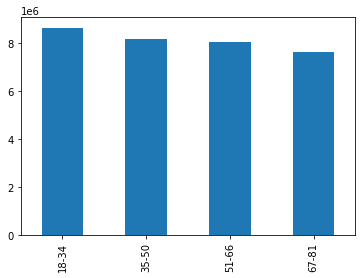

In [59]:
#  age_group viz

bar_age_group = df['age_group'].value_counts().plot.bar()

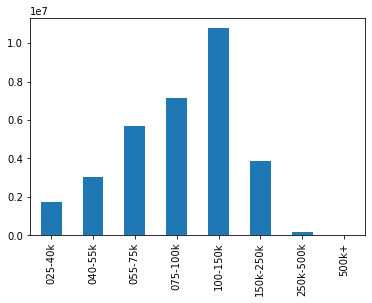

In [60]:
#  income_group viz

bar_income_group = df['income_group'].value_counts().sort_index().plot.bar()

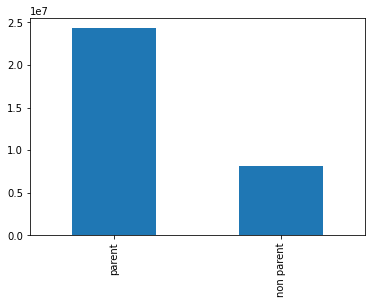

In [61]:
#  parental_status viz

bar_parents = df['parental_status'].value_counts().plot.bar()

# 4.10.7 Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [28]:
#  creating a DF to see outputs of max)order per user_id (for ursage frequency)

df_max_order = df[['max_order', 'user_id']]

In [30]:
df_max_order.head(100)

,max_order,user_id
0,10,1
1,10,1
2,10,1
3,10,1
4,10,1
...,...,...
95,22,15
96,22,15
97,22,15
98,22,15


In [18]:
#  income_group no of orders (usage frequency)

df.groupby('income_group').agg({'max_order': ['min','max','mean']})

max_order               
                   min max       mean
income_group                         
025-40k              2  99  30.129442
040-55k              3  99  31.443518
055-75k              3  99  33.704247
075-100k             3  99  33.387194
100-150k             1  99  33.183189
150k-250k            2  99  33.407332
250k-500k            3  99  38.696027
500k+                3  99  36.973650

There are customers within the 100-150k income range that have ordered only once, vs. all other income groups having generated at least 2 to 3 orders. No group has placed more than 99 orders. The highest earners (from 250k) have the highest amount of orders with an avg. of 37 to 39, compared with 30 orders for the lowest income groups of 25-40k.

In [9]:
#  income_group expenditure

df.groupby('income_group').agg({'prices': ['min','max','mean']})

prices                     
                min      max        mean
income_group                            
025-40k         1.0     25.0    6.495264
040-55k         1.0     25.0    7.138480
055-75k         1.0  14900.0    7.891452
075-100k        1.0  99999.0    9.075728
100-150k        1.0  99999.0   10.439707
150k-250k       1.0  99999.0   22.221368
250k-500k       1.0  99999.0  268.800597
500k+           1.0  99999.0  176.562997

In [10]:
#  investigating price ranges

df['prices'].value_counts().sort_index()

1.0        115143
1.1        242782
1.2        256258
1.3        425691
1.4        392209
            ...  
24.8          410
24.9         5781
25.0        13772
14900.0      4429
99999.0       698
Name: prices, Length: 242, dtype: int64

There are prices of 14900 and 99999 - likely to be outliers. I would verify this with the client and will for now keep a subset without these values as they skew results in expenditure by customer income group and could impact targeted marketing campaigns.

In [11]:
# Create a subset for items valued over 14900

result = []

for value in df['prices']:
    if value >= 14900: 
        result.append('outlier')
    else: 
        result.append('other')

In [12]:
result

['other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',


In [13]:
#  creating a new column for price outliers

df['price_range'] = result

In [14]:
#  checking results - there are 5127 orders at outlier price values, which I will leave out from my subset DF

df['price_range'].value_counts()


other      32399732
outlier        5127
Name: price_range, dtype: int64

In [15]:
#  creating subset without outliers

df_excl_price_outliers = df[df['price_range']=='other']

In [16]:
#  exporting subset without outliers as back up

df_excl_price_outliers.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_customers_excl_price_outliers_4.10.6.pkl'))

In [17]:
#  income_group expenditure xcluding outliers

df_excl_price_outliers.groupby('income_group').agg({'prices': ['min','max','mean']})

prices                
                min   max      mean
income_group                       
025-40k         1.0  25.0  6.495264
040-55k         1.0  25.0  7.138480
055-75k         1.0  25.0  7.875784
075-100k        1.0  25.0  7.962867
100-150k        1.0  25.0  7.963857
150k-250k       1.0  25.0  7.954967
250k-500k       1.0  25.0  7.782805
500k+           1.0  25.0  7.728452

The avg. expenditure for all income groups is almost in line, except for the lowest income group with sits 16% below the avg. of all other income groups. 

# 4.10.8 Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

In [6]:
#  checking value counts of department IDs in main DF (ords_prods_customers) = 21

df['department_id'].value_counts(dropna = False)

4     9479291
16    5398747
19    2887550
7     2688123
1     2234743
13    1875369
3     1172428
15    1068058
20    1051249
9      866627
17     738666
12     708927
14     703033
11     447572
18     423802
6      269253
5      153696
8       97716
21      69145
2       36291
10      34573
Name: department_id, dtype: int64

In [7]:
#  importing departments data in order to have the department name along with department ID which is already present in the DF

df_dep = pd.read_csv(r'C:\Users\christina.savva\Documents\CF Achievement 4 - Instacart Basket Analysis\02 Data\Prepared Data\departments_wrangled.csv', index_col = False)

In [8]:
#  getting an overview of the departments DF - 'Unnamed: 0' column needs to be renamed

df_dep.head()

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [9]:
#  'Unnamed: 0' column = department ID

df_dep['Unnamed: 0'].value_counts(dropna = False)

1     1
12    1
20    1
19    1
18    1
17    1
16    1
15    1
14    1
13    1
11    1
2     1
10    1
9     1
8     1
7     1
6     1
5     1
4     1
3     1
21    1
Name: Unnamed: 0, dtype: int64

In [10]:
#  renaming 'Unnamed: 0' column to department_id

df_dep.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)

In [11]:
#  renaming 'department' column to department_name

df_dep.rename(columns = {'department' : 'department_name'}, inplace = True)

In [12]:
df_dep.head()

,department_id,department_name
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [13]:
df_dep['department_name'].value_counts()

frozen             1
meat seafood       1
deli               1
snacks             1
babies             1
household          1
dairy eggs         1
canned goods       1
breakfast          1
pantry             1
personal care      1
other              1
bulk               1
dry goods pasta    1
pets               1
beverages          1
international      1
alcohol            1
produce            1
bakery             1
missing            1
Name: department_name, dtype: int64

In [40]:
#  I would normally merge the df and df_dep however my PC does not have enough memory, hence why I am going to create a new column to bring in the department names.

df_merged = df_dep.merge(df, on = ['department_id'], how = 'inner', indicator = True)

MemoryError: Unable to allocate 5.31 GiB for an array with shape (22, 32404859) and data type object

In [14]:
df_dep

,department_id,department_name
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [15]:
#  creating new column for department names

df.loc[df['department_id'] == 1, 'department_name'] = 'frozen'
df.loc[df['department_id'] == 2, 'department_name'] = 'other'
df.loc[df['department_id'] == 3, 'department_name'] = 'bakery'
df.loc[df['department_id'] == 4, 'department_name'] = 'produce'
df.loc[df['department_id'] == 5, 'department_name'] = 'alcohol'
df.loc[df['department_id'] == 6, 'department_name'] = 'international'
df.loc[df['department_id'] == 7, 'department_name'] = 'beverages'
df.loc[df['department_id'] == 8, 'department_name'] = 'pets'
df.loc[df['department_id'] == 9, 'department_name'] = 'dry goods pasta'
df.loc[df['department_id'] == 10, 'department_name'] = 'bulk'
df.loc[df['department_id'] == 11, 'department_name'] = 'personal care'
df.loc[df['department_id'] == 12, 'department_name'] = 'meat seafood'
df.loc[df['department_id'] == 13, 'department_name'] = 'pantry'
df.loc[df['department_id'] == 14, 'department_name'] = 'breakfast'
df.loc[df['department_id'] == 15, 'department_name'] = 'canned goods'
df.loc[df['department_id'] == 16, 'department_name'] = 'dairy eggs'
df.loc[df['department_id'] == 17, 'department_name'] = 'households'
df.loc[df['department_id'] == 18, 'department_name'] = 'babies'
df.loc[df['department_id'] == 19, 'department_name'] = 'snacks'
df.loc[df['department_id'] == 20, 'department_name'] = 'deli'
df.loc[df['department_id'] == 21, 'department_name'] = 'missing'

In [16]:
#  checking DF to ensure new column has been created

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 37 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   order_id                 object 
 1   user_id                  object 
 2   eval_set                 object 
 3   order_number             int8   
 4   orders_day_of_week       int8   
 5   order_hour_of_day        int8   
 6   days_since_prior_order   float64
 7   first_order              object 
 8   product_id               int16  
 9   reordered                int8   
 10  product_name             object 
 11  aisle_id                 int8   
 12  department_id            int8   
 13  prices                   float64
 14  price_range_loc          object 
 15  busiest_day              object 
 16  busiest_days             object 
 17  busiest_period_of_day    object 
 18  max_order                int8   
 19  loyalty_flag             object 
 20  spend_group              float64
 21  spend_

In [17]:
#  chcking new column 'department_name' - 69k entries do not have an assigned department (see value 'missing')

df['department_name'].value_counts()

produce            9479291
dairy eggs         5398747
snacks             2887550
beverages          2688123
frozen             2234743
pantry             1875369
bakery             1172428
canned goods       1068058
deli               1051249
dry goods pasta     866627
households          738666
meat seafood        708927
breakfast           703033
personal care       447572
babies              423802
international       269253
alcohol             153696
pets                 97716
missing              69145
other                36291
bulk                 34573
Name: department_name, dtype: int64

In [48]:
#  exporting current DF as backup

df.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_customers_departments_4.10.8.pkl'))

MemoryError: 

In [49]:
#  exporting current DF as backup as csv as pickle did not work

df.to_csv(os.path.join(path, '02 Data','Prepared Data', 'orders_products_customers_departments_4.10.8.csv'))

In [29]:
#  creating a crosstab and stacked bar chart to establish if there is a correlation between region and income_ranges

crosstab_region_income = pd.crosstab(df['region'], df['income_group'], dropna = False)

In [30]:
crosstab_region_income

income_group,025-40k,040-55k,055-75k,075-100k,100-150k,150k-250k,250k-500k,500k+
region,,,,,,,,
Midwest,401040,692586,1334256,1629528,2584501,905991,41764,7659
Northeast,303379,536312,982458,1272174,1921675,677532,25722,3484
South,559129,953806,1765633,2297896,3313734,1207022,53769,3872
West,463650,830083,1620488,1948239,2943452,1077715,41970,4340


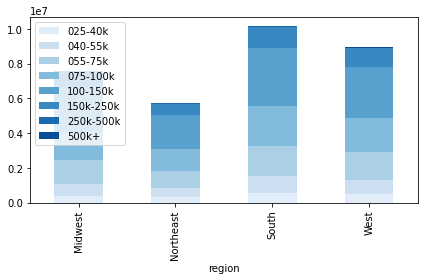

In [38]:
bar_region_income = crosstab_region_income.plot(kind = 'bar', stacked = True, color = sns.color_palette('Blues', 8))
plt.legend(loc='upper left')
plt.tight_layout()

In [45]:
#  creating a crosstab and stacked bar chart to establish if there is a correlation between age_group and region

crosstab_region_age = pd.crosstab(df['region'], df['age_group'], dropna = False)

In [46]:
crosstab_region_age

age_group,18-34,35-50,51-66,67-81
region,,,,
Midwest,2002572,1940979,1882511,1771263
Northeast,1535542,1403642,1426012,1357540
South,2730833,2547137,2505744,2371147
West,2358708,2242812,2216485,2111932


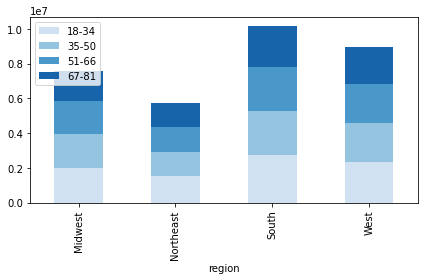

In [47]:
bar_region_age = crosstab_region_age.plot(kind = 'bar', stacked = True, color = sns.color_palette('Blues', 4))
plt.legend(loc='upper left')
plt.tight_layout()

In [53]:
#  creating a crosstab and stacked bar chart to establish if there is a correlation between parental_status and region

crosstab_region_parents = pd.crosstab(df['region'], df['parental_status'], dropna = False)

In [54]:
crosstab_region_parents

parental_status,non parent,parent
region,,
Midwest,1905200,5692125
Northeast,1418301,4304435
South,2529814,7625047
West,2244188,6685749


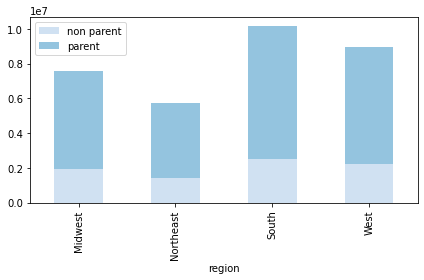

In [55]:
bar_region_parents = crosstab_region_parents.plot(kind = 'bar', stacked = True, color = sns.color_palette('Blues', 4))
plt.legend(loc='upper left')
plt.tight_layout()

In [42]:
#  creating a crosstab and stacked bar chart to establish if there is a correlation between region and departments

crosstab_department_region = pd.crosstab(df['department_name'], df['region'], dropna = False)

In [43]:
crosstab_department_region

region,Midwest,Northeast,South,West
department_name,,,,
alcohol,36186,26542,48517,42451
babies,98983,75139,134548,115132
bakery,273869,208599,365344,324616
beverages,625574,483418,844562,734569
breakfast,163551,123574,220484,195424
bulk,8193,5802,10766,9812
canned goods,250702,186755,334434,296167
dairy eggs,1264223,954026,1691315,1489183
deli,245678,186817,329717,289037


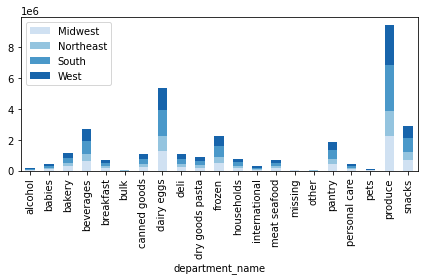

In [44]:
bar_department_region = crosstab_department_region.plot(kind = 'bar', stacked = True, color = sns.color_palette('Blues', 4))
plt.legend(loc='upper left')
plt.tight_layout()

In [48]:
#  creating a crosstab and stacked bar chart to establish if there is a correlation between age_group and departments

crosstab_department_age = pd.crosstab(df['department_name'], df['age_group'], dropna = False)

In [49]:
crosstab_department_age

age_group,18-34,35-50,51-66,67-81
department_name,,,,
alcohol,42621,38756,37458,34861
babies,111092,111442,104070,97198
bakery,312752,293569,292191,273916
beverages,708101,672118,672660,635244
breakfast,189037,175974,174717,163305
bulk,9302,8810,8297,8164
canned goods,285891,266849,265387,249931
dairy eggs,1445304,1360907,1324583,1267953
deli,279021,264147,261425,246656


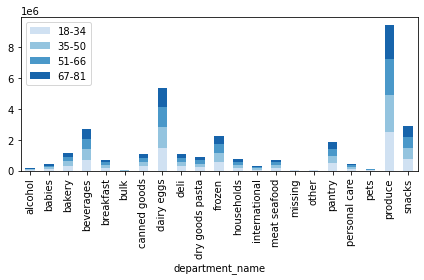

In [50]:
bar_department_age = crosstab_department_age.plot(kind = 'bar', stacked = True, color = sns.color_palette('Blues', 4))
plt.legend(loc='upper left')
plt.tight_layout()

In [56]:
#  creating a crosstab and stacked bar chart to establish if there is a correlation between parental_status and departments

crosstab_department_parents = pd.crosstab(df['department_name'], df['parental_status'], dropna = False)

In [57]:
crosstab_department_parents

parental_status,non parent,parent
department_name,,
alcohol,39118,114578
babies,106494,317308
bakery,294405,878023
beverages,674442,2013681
breakfast,174577,528456
bulk,8278,26295
canned goods,264838,803220
dairy eggs,1349362,4049385
deli,265145,786104


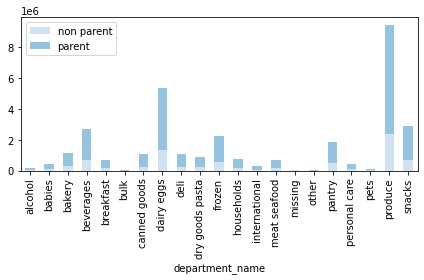

In [58]:
bar_department_parents = crosstab_department_parents.plot(kind = 'bar', stacked = True, color = sns.color_palette('Blues', 4))
plt.legend(loc='upper left')
plt.tight_layout()

In [64]:
#  exporting vizualisations

bar_age_group.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','4.10', 'bar_age_group.png'))
bar_income_group.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','4.10', 'bar_income_group.png'))
bar_parents.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','4.10', 'bar_parents.png'))
bar_region_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','4.10', 'bar_region_income.png'))
bar_region_age.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','4.10', 'bar_region_age.png'))
bar_region_parents.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','4.10', 'bar_region_parents.png'))
bar_department_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','4.10', 'bar_department_region.png'))
bar_department_age.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','4.10', 'bar_department_age.png'))
bar_department_parents.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','4.10', 'bar_department_parents.png'))


In [65]:
#  exporting final DF

df.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_customers_departments_final.pkl'))